In [27]:

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.datasets import load_breast_cancer
from matplotlib import font_manager, rc
plt.rc('font', family='Malgun Gothic')

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# 디폴트는 learning_late  = 0.1, n_estimators=100, max_depth :3 이다
# 깊이 3인 트리가 100개
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("현재 깊이 3일떄의 훈련 세트")
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

cvscores = cross_val_score(gbrt,cancer.data,cancer.target,cv=5)
print("cv = 5 일때의 테스트 세트")
print("훈련 세트 정확도: {:.3f}".format(cvscores.mean()))

cvscores = cross_val_score(gbrt, cancer.data, cancer.target, cv=10)
print("cv = 10 일때의 테스트 세트")
print("훈련 세트 정확도: {:.3f}".format(cvscores.mean()))

# 폴드수가 높아짐에 따라 정확도가 감소함
# 훈련 세트의 정확도가 100프로이기 떄문에 과대 적합임

현재 깊이 3일떄의 훈련 세트
훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965
cv = 5 일때의 테스트 세트
훈련 세트 정확도: 0.963
cv = 10 일때의 테스트 세트
훈련 세트 정확도: 0.960



깊이를 1로 낮춘 경우
훈련 세트 정확도: 0.991
훈련 세트 정확도: 0.972
훈련 세트 정확도: 5 = 0.965
훈련 세트 정확도: 10 = 0.961

학습률을 낮춘 경우
훈련 세트 정확도: 0.988
훈련 세트 정확도: 0.965
훈련 세트 정확도: 5 = 0.944
훈련 세트 정확도: 10 = 0.946


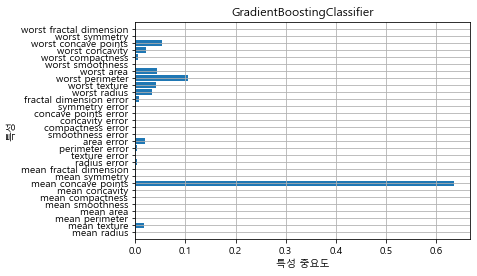

In [32]:


print("\n깊이를 1로 낮춘 경우")
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

cvscores = cross_val_score(gbrt,cancer.data,cancer.target,cv=5)
print("훈련 세트 정확도: 5 = {:.3f}".format(cvscores.mean()))

cvscores = cross_val_score(gbrt, cancer.data, cancer.target, cv=10)
print("훈련 세트 정확도: 10 = {:.3f}".format(cvscores.mean()))

print("\n학습률을 낮춘 경우")
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

cvscores = cross_val_score(gbrt,cancer.data,cancer.target,cv=5)
print("훈련 세트 정확도: 5 = {:.3f}".format(cvscores.mean()))

cvscores = cross_val_score(gbrt, cancer.data, cancer.target, cv=10)
print("훈련 세트 정확도: 10 = {:.3f}".format(cvscores.mean()))

# 앞부분의 중요도 함수
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.title(model.__class__.__name__)
    plt.ylim(-1, n_features)
    plt.grid()
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)
plot_feature_importances_cancer(gbrt)

In [61]:
# 데이터 준비
from  sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500,noise=0.30,random_state=42)
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42)

# 보팅클래스 : 랜덤포레스트, 로지스틱 회귀, 결정트리
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(solver="lbfgs",random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100,random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=3,random_state=42)

voting_clf1 = VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('dt',dt_clf)],voting='hard')
voting_clf1.fit(X_train,y_train)
print(voting_clf1.voting)
for clf in (log_clf,rnd_clf,dt_clf,voting_clf1):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test, y_pred))

voting_clf2 = VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('dt',dt_clf)],voting='soft')
voting_clf2.fit(X_train,y_train)
print(voting_clf2.voting)

for clf in (log_clf,rnd_clf,dt_clf,voting_clf2):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))
# voting의 결과가 같은데 왜 그런지 모르겠음.

hard
LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904
soft
LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


In [63]:
#OBB
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=True, oob_score=True,random_state=40)
bag_clf.fit(X_train,y_train)

#obb-score 출력
print("oob_score : ",bag_clf.oob_score_)

#decisiontree bagging

# 데이터가 작은 경우 테스트 세트를 떼어 놓지 않고 다 넣고 싶을때 사용
# 수행방법이 다르기 떄문에 테스트 데이터와 좀 다름(예측값)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

oob_score :  0.8986666666666666


0.912

In [69]:
# XGBoost
# install
import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators=100,max_depth=3,random_state=42,eval_metric='logloss')

xgb_clf.fit(X_train,y_train)
y_pred = xgb_clf.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\JS\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.872

Text(0, 0.5, '특성 1')

C:\Users\JS\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\JS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


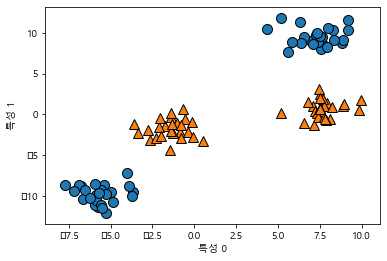

In [83]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

X,y = make_blobs(centers=4, random_state=8)
y = y % 2
# 비 선형 데이터셋
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")


Text(0, 0.5, '특성 1')

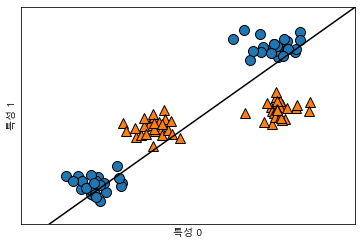

In [84]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=5000,tol=1e-3).fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
# 선형 svm으로 만들어진 경계

Text(0.5, 0, '특성 1**2')

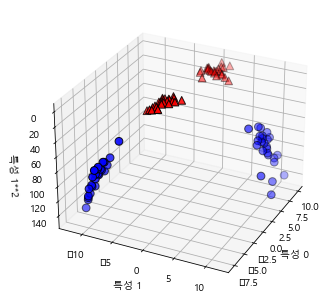

In [119]:
# 3차원으로 이전

X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D,axes3d
figure = plt.figure()

ax = Axes3D(figure,elev=-152,azim=-26)

mask = y == 0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1**2")
# 3차원 그래프로 바꿈



Text(0.5, 0, '특성 1 ** 2')

C:\Users\JS\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\JS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


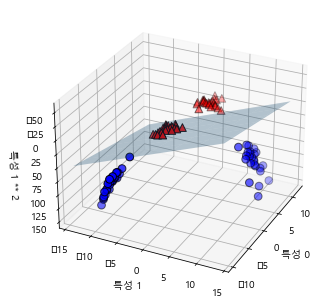

In [120]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 결정 경계 그리기
figure = plt.figure()

ax= Axes3D(figure,elev=-152,azim=-26)
xx =  np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() +2, 50)
yy =  np.linspace(X_new[:,1].min() - 2, X_new[:,1].max() +2, 50)

XX, YY = np.meshgrid(xx,yy)

ZZ = (coef[0] * XX+ coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8 ,alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60,edgecolor='k')

ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1 ** 2")

<ipython-input-122-8d1f01112a57>:3: UserWarning: The following kwargs were not used by contour: 'cmp'
  plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],cmp=mglearn.cm2,alpha=0.5)


Text(0, 0.5, '특성 1')

C:\Users\JS\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\JS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


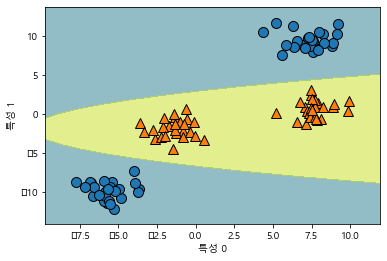

In [122]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],cmp=mglearn.cm2,alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

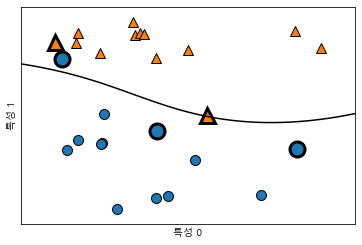

In [129]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
# mglearn.discrete_scatter(svm,X,y)
# mglearn.plots.plot_2d_separator(svm,X,eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:,0], X[:,1],y)
sv = svm.support_vectors_
# 부호에 의해 서포트 벡터의 클래스 레이블이 결정됨
sv_labels = svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

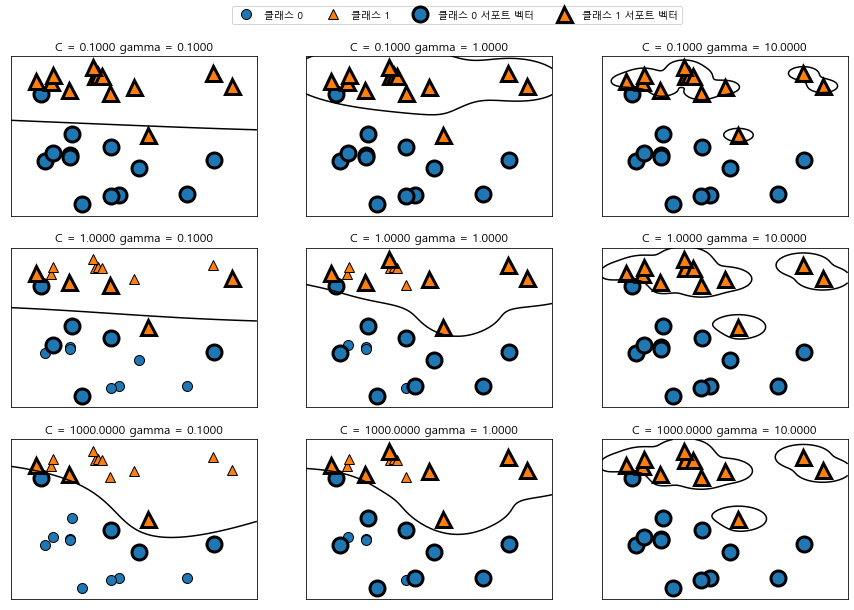

In [132]:
# 매개변수 튜닝
fig, axes = plt.subplots(3,3,figsize=(15,10))

# 2중 포문을 이용해 c = 0.1,1,1000 인것, gamma 0.1,1,10 까지 총 9개의 레이블 표기
for ax, C in zip(axes,[-1,0,3]):
    for a, gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)
axes[0,0].legend(["클래스 0","클래스 1", "클래스 0 서포트 벡터","클래스 1 서포트 벡터"], ncol=4,loc=(.9,1.2))

In [163]:

cancer = load_breast_cancer()
X_train, X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

# 추가되지 않은 코드
n_features = X_train.shape[1]
svc = SVC(C=1,gamma=1/n_features)

# svc = SVC()
svc.fit(X_train,y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train,y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test,y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.63


Text(0, 0.5, '특성 크기')

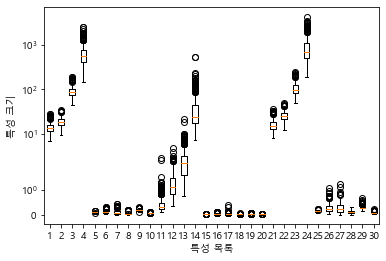

In [172]:
# plt.boxplot(X_train, manage_xticks=False)
# 작은 눈금 안보기가 안되어서 뺐습니다.
plt.boxplot(X_train)

plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

In [179]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 범위(최대-최소) 계산
range_on_training = (X_train - min_on_training).max(axis=0)
# 훈련 데이터에서 최솟값을 빼고 범위로 나누면 0~1까지 값으로 정규화가 됨.
X_train_scale = (X_train - min_on_training)/ range_on_training
print("특성별 최솟값\n", X_train_scale.min(axis=0))
print("특성별 최댓값\n", X_train_scale.max(axis=0))

X_test_scaled = (X_test - min_on_training)/ range_on_training

# svc = SVC()

n_features = X_train.shape[1]
svc = SVC(C=1,gamma=1/n_features)
svc.fit(X_train_scale, y_train)

print("훈련 세트 정확도 {:.3f}".format(svc.score(X_train_scale,y_train)))
print("테스트 세트 정확도 {:.3f}".format(svc.score(X_test_scaled,y_test)))

print("\nC=1000")
svc = SVC(C=1000,gamma=1/n_features)
svc.fit(X_train_scale,y_train)
print("훈련 세트 정확도 {:.3f}".format(svc.score(X_train_scale,y_train)))
print("테스트 세트 정확도 {:.3f}".format(svc.score(X_test_scaled,y_test)))


특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
훈련 세트 정확도 0.948
테스트 세트 정확도 0.951

C=1000
훈련 세트 정확도 0.988
테스트 세트 정확도 0.972


Text(0, 0.5, 'relu(x), tanh(x)')

C:\Users\JS\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\JS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


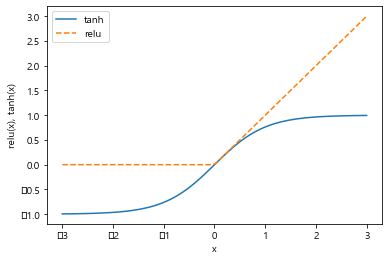

In [182]:
# 신경망
line = np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label="tanh")
plt.plot(line, np.maximum(line,0), linestyle='--',label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

Text(0, 0.5, '특성 1')

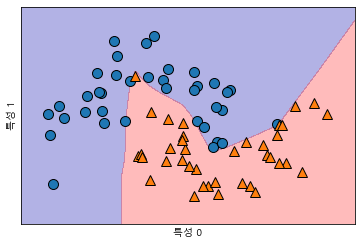

In [206]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100,noise=0.25, random_state=3)

X_train, X_test,y_train,y_test = train_test_split(X,y,stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

g
g
g
g
g
g
g
g


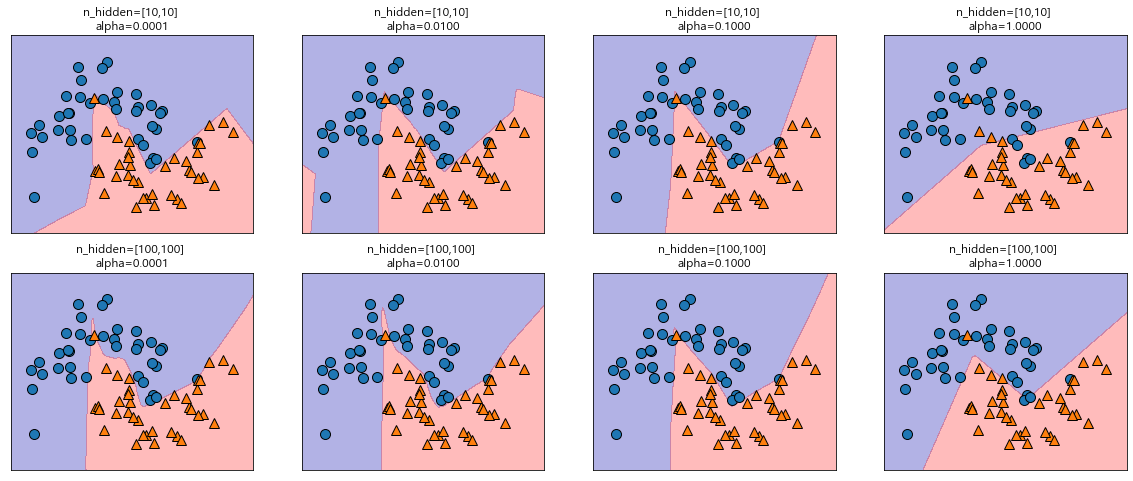

In [219]:

fig, axes = plt.subplots(2,4,figsize=(20,8))
for axx, n_hidden_nodes in zip(axes,[10,100]):
    for ax, alpha in zip(axx,[0.0001,0.01,0.1,1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,max_iter=1000, hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title("n_hidden=[{},{}] \nalpha={:.4f}".format(n_hidden_nodes,n_hidden_nodes,alpha))